In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('regex_imdb.csv')

In [ ]:
# смотрим данные
data.head()

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [ ]:
# смотрим размерность данных
data.shape

(1000, 10)

In [ ]:
# проверяем, есть ли пропущенные значения
data.isna().sum()

Name            0
Year            0
Genre           0
Run_time        0
Rating          0
Meta_score    228
Votes           0
Director        2
cast            0
Gross         170
dtype: int64

In [ ]:
# удаляем пропущенные значения
data = data.dropna()

In [ ]:
#проверяем дубликаты
data.duplicated().sum()

0

In [ ]:
data.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

In [ ]:
data.count()

Name          682
Year          682
Genre         682
Run_time      682
Rating        682
Meta_score    682
Votes         682
Director      682
cast          682
Gross         682
dtype: int64

In [ ]:
data.to_csv('movies.csv', sep=',')

In [ ]:
database_path = r'C:\Users\Acer\Downloads\movies_project'

In [ ]:
engine = create_engine(f'sqlite:///{database_path}')

In [ ]:
# Подключаюсь к базе данных
connection = engine.connect()

In [ ]:
# Название новой таблицы в базеданных
table_name = 'movies'

In [ ]:
# Загружаю датафрейм в базу данных
data.to_sql(table_name, engine, if_exists='replace', index=False)

682

In [ ]:
connection.close()

In [9]:
con = sqlite3.connect(r'movies_project', timeout=10)
cur = con.cursor()

In [11]:
#топ-10 фильмов
top_rating = pd.read_sql(sql='select * from top_rating', con=con)
top_rating

,Name,Genre,Rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime, Drama",9.2
2,The Dark Knight,"Action, Crime, Drama",9.0
3,The Godfather: Part II,"Crime, Drama",9.0
4,12 Angry Men,"Crime, Drama",9.0
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",8.9
6,Pulp Fiction,"Crime, Drama",8.9
7,Schindler's List,"Biography, Drama, History",8.9
8,Inception,"Action, Adventure, Sci-Fi",8.8
9,Fight Club,Drama,8.8


In [12]:
movies_count = pd.read_sql(sql='select * from movies_count', con=con)
movies_count

,Year,movies_count
0,1925,1
1,1927,1
2,1930,1
3,1931,1
4,1933,1
...,...,...
82,2015,19
83,2016,20
84,2017,18
85,2018,11


In [15]:
year = movies_count['Year']
count = movies_count['movies_count']

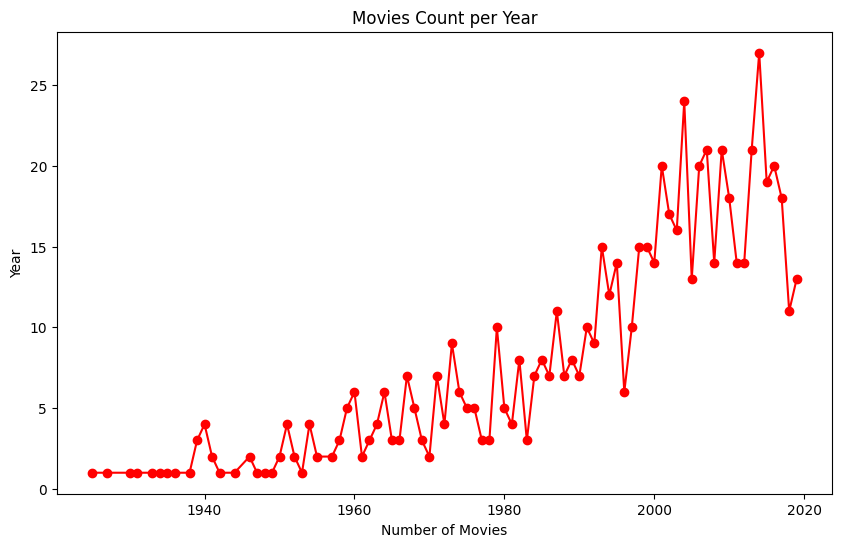

In [27]:
#Визуализация movies_count
plt.figure(figsize=(10, 6))
plt.plot(year, count, color='r', marker='o', linestyle='-' )
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.title('Movies Count per Year')
plt.show()

In [29]:
nolan_rating = pd.read_sql(sql='select * from Nolan_rating', con=con)
nolan_rating

,Name,Genre,Year,Votes
0,The Dark Knight,"Action, Crime, Drama",2008,2341261
1,Inception,"Action, Adventure, Sci-Fi",2010,2099854
2,Interstellar,"Adventure, Drama, Sci-Fi",2014,1544204
3,The Dark Knight Rises,"Action, Adventure",2012,1536594
4,Batman Begins,"Action, Adventure",2005,1325535
5,The Prestige,"Drama, Mystery, Sci-Fi",2006,1208183
6,Memento,"Mystery, Thriller",2000,1139186
7,Dunkirk,"Action, Drama, History",2017,567652


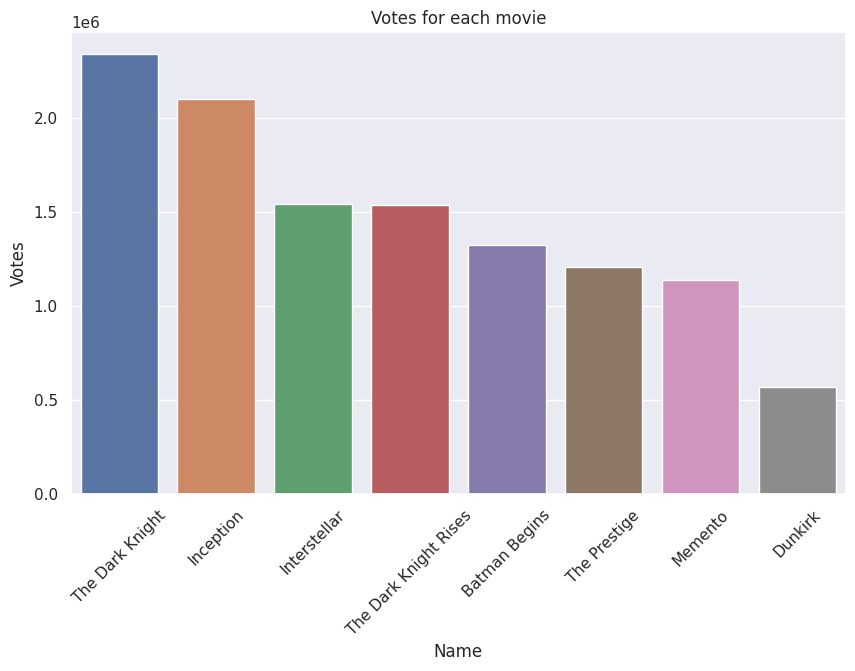

In [36]:
#Фильмы Нолана по популярности
data = nolan_rating['Votes']
labels = nolan_rating['Name']
colors = sns.color_palette('pastel')[ 0:5 ]
plt.figure(figsize=(10, 6))
plt.title('Number of Votes per Movie')
sns.barplot(x=labels, y=data, )
plt.xticks(rotation=45)
plt.xlabel('Name')
plt.ylabel('Votes')
plt.title('Votes for each movie')
plt.show()

In [42]:
avg_gross = pd.read_sql(sql='select * from avg_gross_by_year', con=con)
avg_gross

,Year,avg_gross
0,2018,216.888
1,1977,164.677
2,2012,159.499
3,2019,159.234
4,2010,138.023
...,...,...
82,1955,0.355
83,1936,0.160
84,1950,0.055
85,1925,0.050


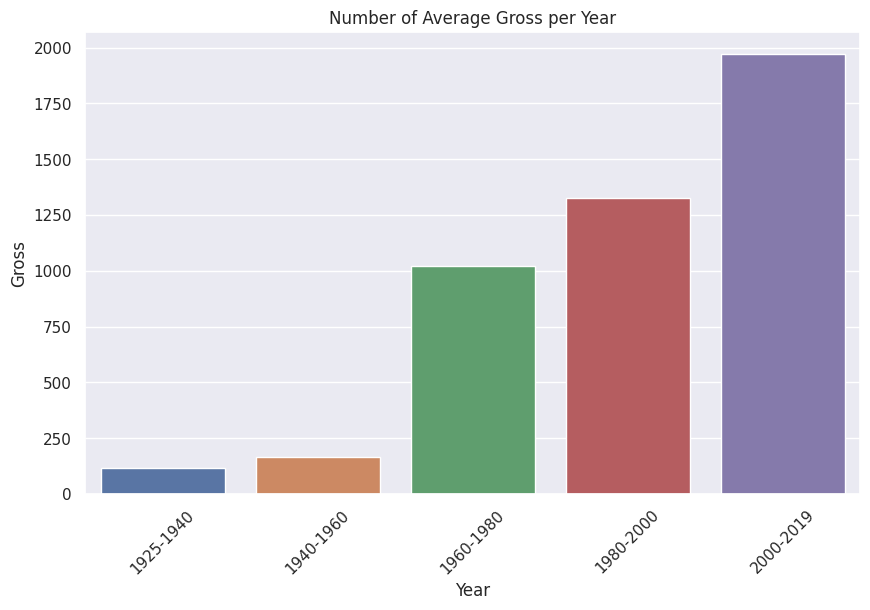

In [47]:

bins = [1925, 1940, 1960, 1980, 2000, 2020]
labels = ['1925-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2019']

avg_gross['Interval'] = pd.cut(avg_gross['Year'], bins=bins, labels=labels)
grouped_data = avg_gross.groupby('Interval')['avg_gross'].sum()

colors = sns.color_palette('pastel')[ 0:5 ]
plt.figure(figsize=(10, 6))
plt.title('Number of Average Gross per Year')
sns.barplot(x=labels, y=grouped_data )
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Gross')
plt.show()